### Name: Rishikesh Vadoadaria

### Roll No. C114

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Grid World Setup
GRID_SIZE = 5
GAMMA = 0.9  # Discount factor
ALPHA = 0.1  # Learning rate
EPISODES = 500  # Number of episodes

In [3]:
rewards = np.full((GRID_SIZE, GRID_SIZE), -1)  # Step penalty
rewards[4, 4] = 10  # Goal state
obstacles = [(1, 1), (2, 2), (3, 3), (1, 3)]
for obs in obstacles:
    rewards[obs] = -10

In [4]:
# Initialize value function
V_td0 = np.zeros((GRID_SIZE, GRID_SIZE))
V_td1 = np.zeros((GRID_SIZE, GRID_SIZE))

In [5]:
def get_next_state(state, action):
    """Returns the next state given a state and an action."""
    i, j = state
    if action == 0 and i > 0:  # Up
        i -= 1
    elif action == 1 and i < GRID_SIZE - 1:  # Down
        i += 1
    elif action == 2 and j > 0:  # Left
        j -= 1
    elif action == 3 and j < GRID_SIZE - 1:  # Right
        j += 1
    return (i, j)

In [6]:
def td_0():
    """TD(0) Learning Algorithm."""
    for episode in range(EPISODES):
        state = (0, 0)  # Start state
        while state != (4, 4):  # Until goal state is reached
            action = np.random.choice(4)  # Random action
            next_state = get_next_state(state, action)
            reward = rewards[next_state]
            V_td0[state] += ALPHA * (reward + GAMMA * V_td0[next_state] - V_td0[state])
            state = next_state

In [7]:
def td_1():
    """TD(1) Learning Algorithm (Monte Carlo with discounting)."""
    for episode in range(EPISODES):
        state = (0, 0)
        trajectory = []
        rewards_collected = []

        while state != (4, 4):
            action = np.random.choice(4)
            next_state = get_next_state(state, action)
            reward = rewards[next_state]
            trajectory.append(state)
            rewards_collected.append(reward)
            state = next_state

        G = 0
        for t in reversed(range(len(trajectory))):
            G = rewards_collected[t] + GAMMA * G
            V_td1[trajectory[t]] += ALPHA * (G - V_td1[trajectory[t]])

In [8]:
td_0()
td_1()

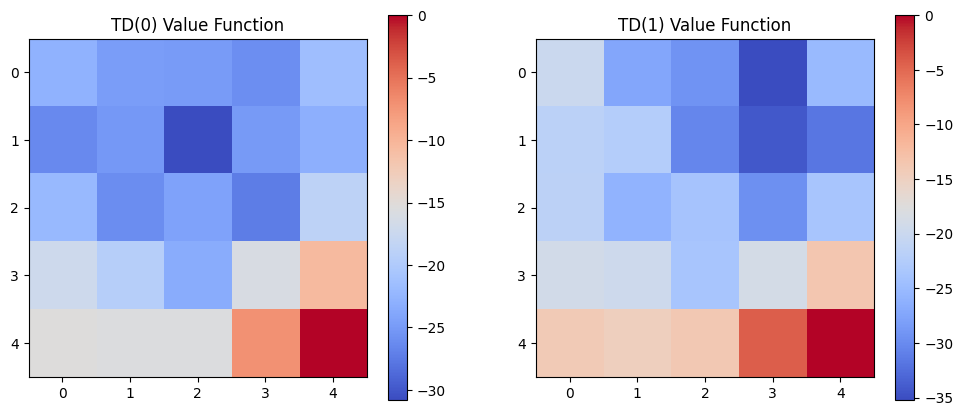

In [9]:
# Plotting results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(V_td0, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("TD(0) Value Function")
plt.subplot(1, 2, 2)
plt.imshow(V_td1, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("TD(1) Value Function")
plt.show()

TD(0) is faster in updating state values but less accurate in long-term prediction.
TD(1) provides better long-term value estimation but takes longer to converge.
Temporal Difference learning bridges the gap between Monte Carlo and Dynamic Programming approaches by learning from experience without requiring a full model of the environment.
Both methods are essential for different reinforcement learning scenarios, depending on whether immediate updates or full trajectory evaluation is preferred.

# Difference between Monte Carlo and TD

Temporal Difference (TD) Prediction and Monte Carlo (MC) Prediction differ primarily in how they update state values.

TD updates values incrementally at each step by using the reward and estimated value of the next state (bootstrapping), making it faster and more data-efficient.

In contrast, MC waits until the end of an episode to compute the total return before updating values, leading to unbiased but high-variance estimates.

TD is generally more stable and suited for continuous learning, while MC works well in episodic environments where full trajectories can be observed.

Additionally, TD's lower computational complexity makes it more practical for real-time learning, whereas MC requires complete episodes, which can slow convergence. Overall, TD is preferable when quick updates are needed, whereas MC is beneficial for tasks with clearly defined episodes and rewards.